In [ ]:
# instalar: pip install scikit-image

# Convertendo o formato

**skimage.color.rgb2gray()**: converter a imagem de RGB para escala de cinza.

In [ ]:
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

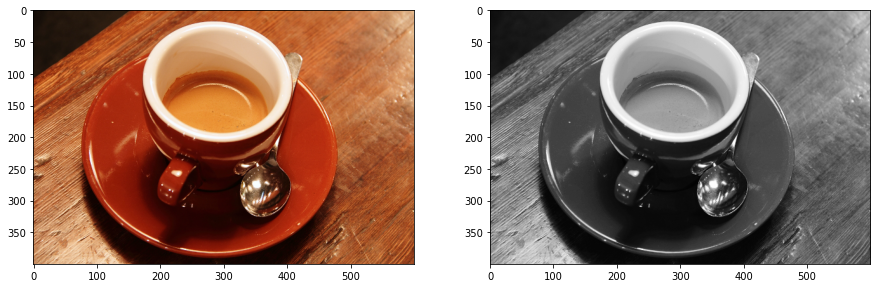

In [ ]:
plt.figure(figsize=(15,15))
coffee = data.coffee()
plt.subplot(121), plt.imshow(coffee)
gray_coffee = rgb2gray(coffee)
plt.subplot(122)
plt.imshow(gray_coffee, cmap='gray')

plt.show()

**skimage.color.rgb2hsv()**: converter a imagem de RGB para HSV.

No HSV as cores são definidas em termos de matiz, saturação e valor.

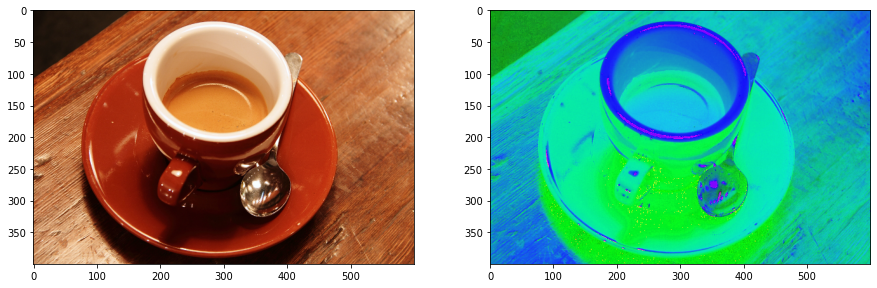

In [ ]:
from skimage.color import rgb2hsv

plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(coffee)
hsv_coffee = rgb2hsv(coffee)
# falar no discord
# plt.subplot(122), hsv_coffee_colorbar = plt.imshow(hsv_coffee)
plt.subplot(122), plt.imshow(hsv_coffee)
# plt.colobar(hsv_coffee_colorbar, fraction=0.056, pad=.04)

plt.show()

# Segmentação Supervisionada

Existe interferência manual para parametrizar a segmentação da imagem.

## Segmentação por limiarização - Parametrização manual

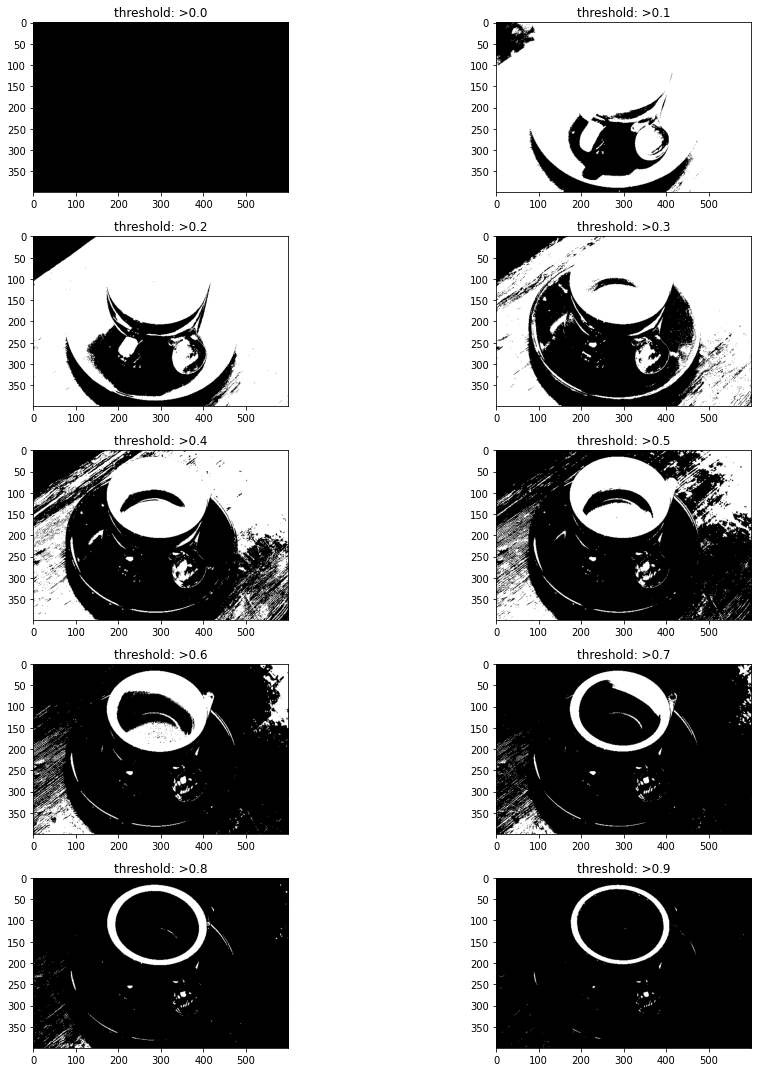

In [ ]:
from skimage import filters

plt.figure(figsize=(15,15))

for i in range(10):
  binarized_gray = (gray_coffee > i*0.1)
  plt.subplot(5, 2, i+1)
  plt.title('threshold: >'+str(round(i*.1,1)))
  plt.imshow(binarized_gray, cmap='gray')
plt.tight_layout()

## Segmentação com limiarização utilizando skimage.filters

**Niblack e Sauvola**: limiarização local que altera o limiar dependendo da média local e do desvio padrão para cada pixel em uma máscara em convolução com a imagem.

**Otsu**: iterando sobre todos os valores de limiar possíveis e calculando uma medida de dispersão para os pontos de amostra em ambos os lados do limiar: em primeiro ou segundo plano.

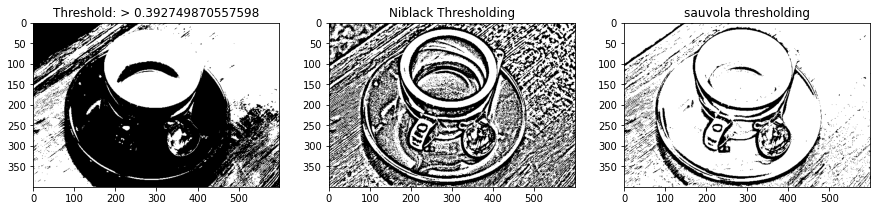

In [ ]:
plt.figure(figsize=(15,15))
# otsu
threshold = filters.threshold_otsu(gray_coffee)
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(131), plt.title('Threshold: > ' + str(threshold))
plt.imshow(binarized_coffee, cmap='gray')

# niblack
threshold = filters.threshold_niblack(gray_coffee)
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(132), plt.title('Niblack Thresholding')
plt.imshow(binarized_coffee, cmap='gray')

# sauvola
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(133), plt.title('sauvola thresholding')
binarized_coffee = (gray_coffee > threshold)*1
plt.imshow(binarized_coffee, cmap='gray')

## Segmentacao por contorno ativo

Utiliza o conceito de minimizacao funcional de energia. Um contorno ativo e uma abordagem de segmentacao que usa forcas e restricoes de energia para separar os pixels de interesse do restante da imagem para posterior processamento e analise.

**skimage.segmentation.active_contour()**

In [ ]:
from skimage.segmentation import active_contour
from skimage.filters import gaussian

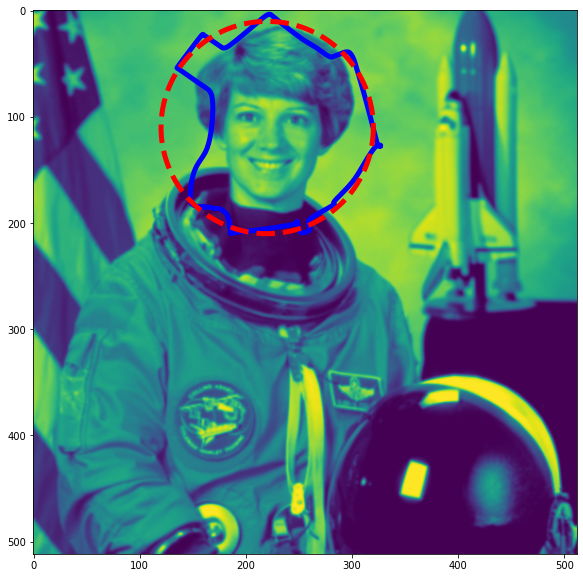

In [ ]:
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)
# localizando o centro do circulo em 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 110 + 100*np.sin(np.linspace(0, 2*np.pi, 500))
# criando um circulo
snake = np.array([x1, x2]).T
astronaut_snake = active_contour(gray_astronaut_noiseless, snake)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(gray_astronaut_noiseless)
ax.plot(astronaut_snake[:, 0],
        astronaut_snake[:, 1],
        '-b', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)